In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
import warnings
import os

warnings.filterwarnings('ignore')

# make sure we're in right directory
os.chdir('/Users/rosswilson/Projects/ironhack/lab-eda-bivariate/')

# Load data
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

print("Data loaded!")
print(df.head())
print(df.info())

Data loaded!
   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  
<class 'pandas.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 c


PART 1: Best Seler Trends

Crosstab:
isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]

Top 10 categories by bestseller proportion:
category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Billiard, Snooker & Pool          0.032129
Pet Supplies                      0.03020

<Figure size 1200x600 with 0 Axes>

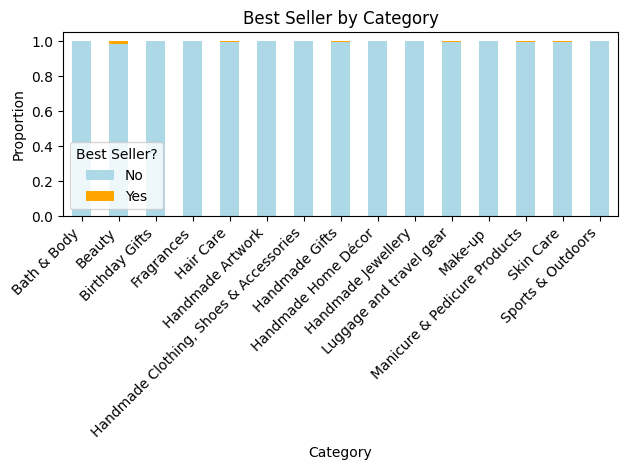

In [3]:
print("\n" + "="*50)
print("PART 1: Best Seler Trends")  # typo: Seler instead of Seller
print("="*50)

# crosstab of category and bestseller
ct = pd.crosstab(df['category'], df['isBestSeller'])
print("\nCrosstab:")
print(ct)

# proportion of bestsellers per category
bestseller_prop = df.groupby('category')['isBestSeller'].mean().sort_values(ascending=False)
print("\nTop 10 categories by bestseller proportion:")
print(bestseller_prop.head(10))

# Chi square test
chi2, p_value, dof, expected = chi2_contingency(ct)
print(f"\nChi-square test results:")
print(f"Chi2 = {chi2:.4f}")
print(f"P-value = {p_value:.4f}")
if p_value < 0.05:
    print("Best-seller status is NOT independent of category")
else:
    print("Best-seller status IS independent of category")

# cramers V
n = ct.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ct.shape) - 1)))
print(f"\nCramér's V: {cramers_v:.4f}")

# stacked bar chart for top categories
top_cats = df['category'].value_counts().head(15).index
df_top = df[df['category'].isin(top_cats)]

ct_plot = pd.crosstab(df_top['category'], df_top['isBestSeller'], normalize='index')

plt.figure(figsize=(12,6))
ct_plot.plot(kind='bar', stacked=True, color=['lightblue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.title('Best Seller by Category')
plt.legend(title='Best Seller?', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

PART 2: Prices & Ratings

Price range: -44.01 to 99.99
Before: 2443651 rows, After: 2115963 rows


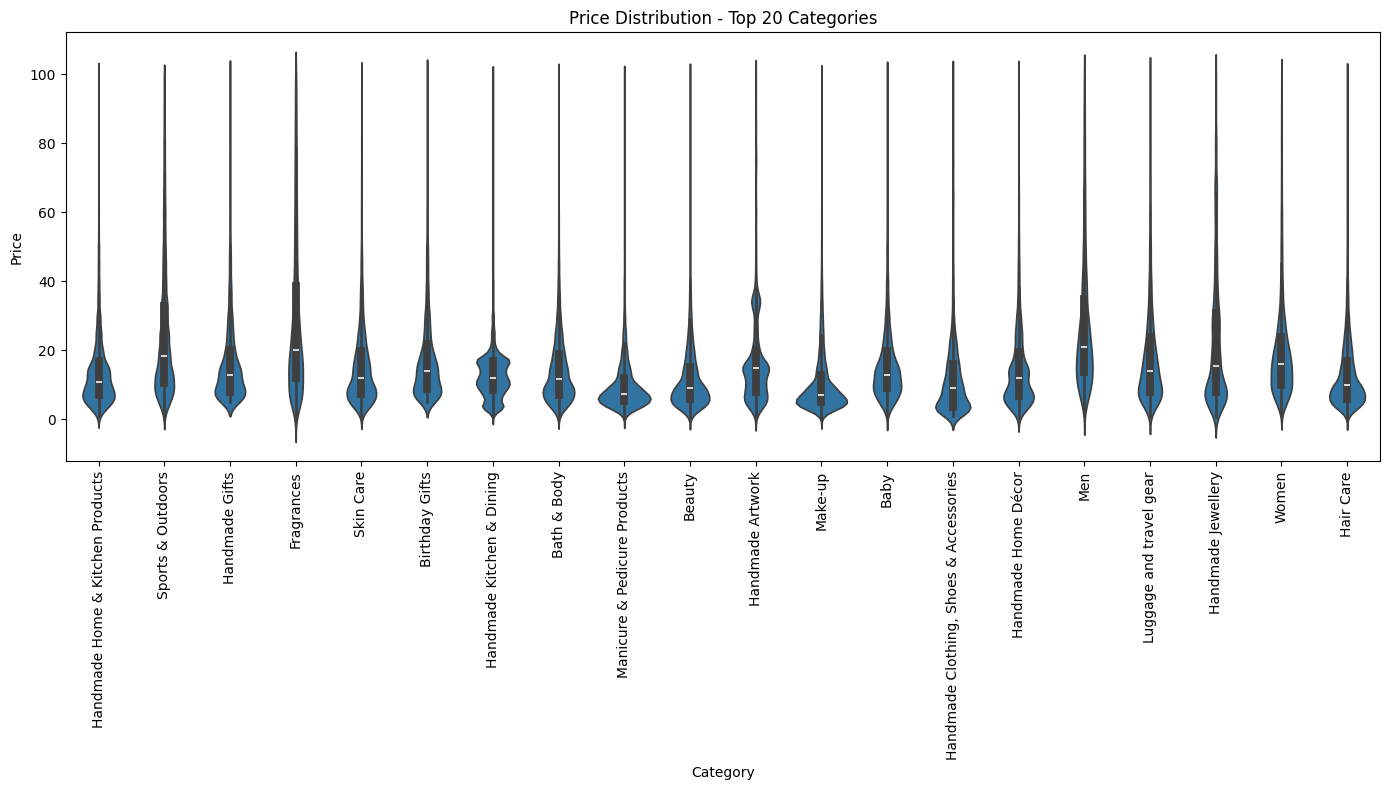


Highest median price category: Desktop PCs - £74.00


In [5]:
print("PART 2: Prices & Ratings")

## Remove outliers with IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"\nPrice range: {lower:.2f} to {upper:.2f}")

df_clean = df[(df['price'] >= lower) & (df['price'] <= upper)]
print(f"Before: {len(df)} rows, After: {len(df_clean)} rows")

# violin plot - top 20 categories
top20 = df_clean['category'].value_counts().head(20).index
df_top20 = df_clean[df_clean['category'].isin(top20)]

plt.figure(figsize=(14,8))
sns.violinplot(data=df_top20, x='category', y='price')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price Distribution - Top 20 Categories')
plt.tight_layout()
plt.show()

# highest median price (all categories not just top 20)
median_prices = df_clean.groupby('category')['price'].median().sort_values(ascending=False)
print(f"\nHighest median price category: {median_prices.index[0]} - £{median_prices.iloc[0]:.2f}")

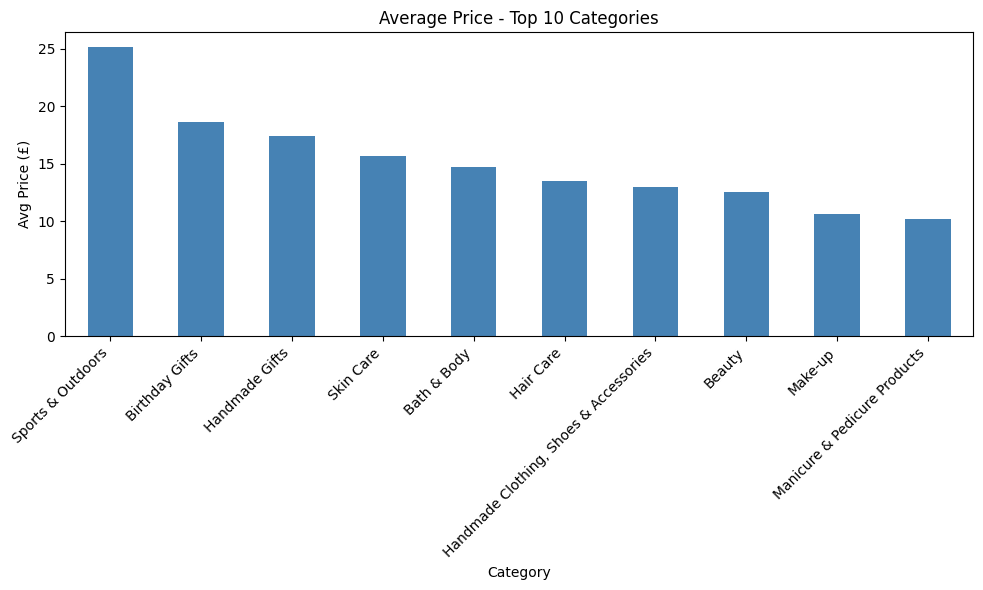


Highest average price: Motherboards - £68.77


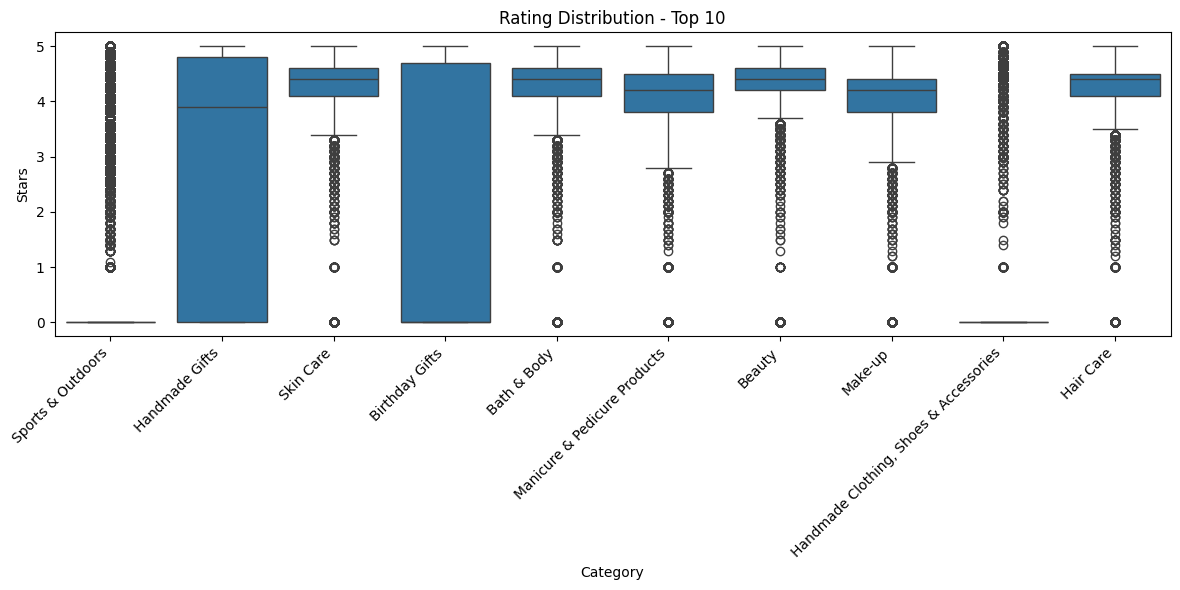


Highest median rating: Computer Memory - 4.70 stars


In [6]:
# bar chart for aveg price - top 10 categories by count
top10 = df_clean['category'].value_counts().head(10).index
avg_price_top10 = df_clean[df_clean['category'].isin(top10)].groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_price_top10.plot(kind='bar', color='steelblue')
plt.xlabel('Category')
plt.ylabel('Avg Price (£)')
plt.title('Average Price - Top 10 Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# highest avg price across ALL categories
avg_all = df_clean.groupby('category')['price'].mean().sort_values(ascending=False)
print(f"\nHighest average price: {avg_all.index[0]} - £{avg_all.iloc[0]:.2f}")

# box plots for ratings - top 10
top10_rating = df_clean['category'].value_counts().head(10).index
df_rating = df_clean[df_clean['category'].isin(top10_rating)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_rating, x='category', y='stars')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Stars')
plt.title('Rating Distribution - Top 10')
plt.tight_layout()
plt.show()

# highest median rating all categories
median_rating = df_clean.groupby('category')['stars'].median().sort_values(ascending=False)
print(f"\nHighest median rating: {median_rating.index[0]} - {median_rating.iloc[0]:.2f} stars")

PART 3: Price vs Rating Correlation

Correlation: -0.0777
Weak correlation


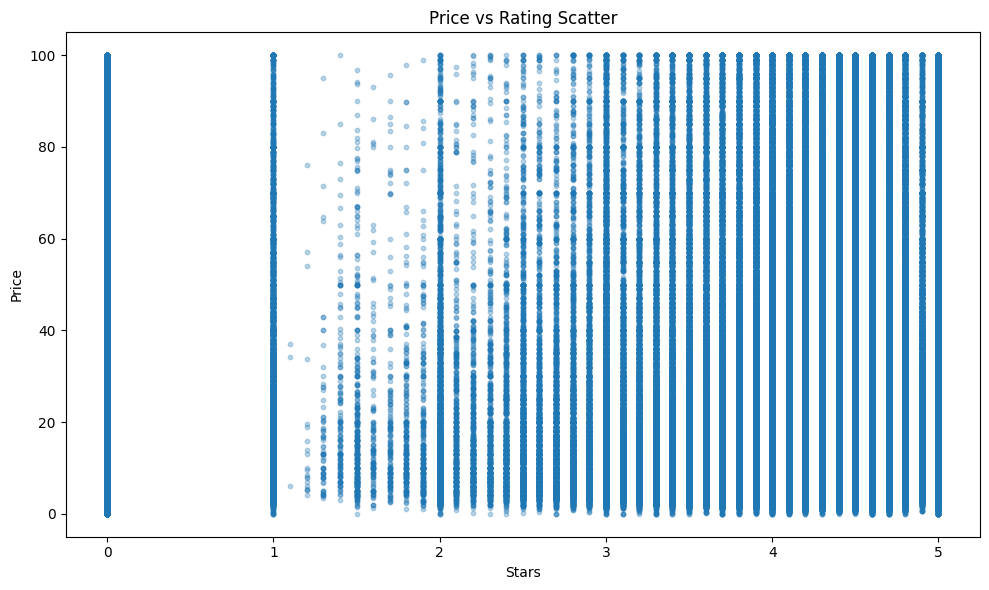

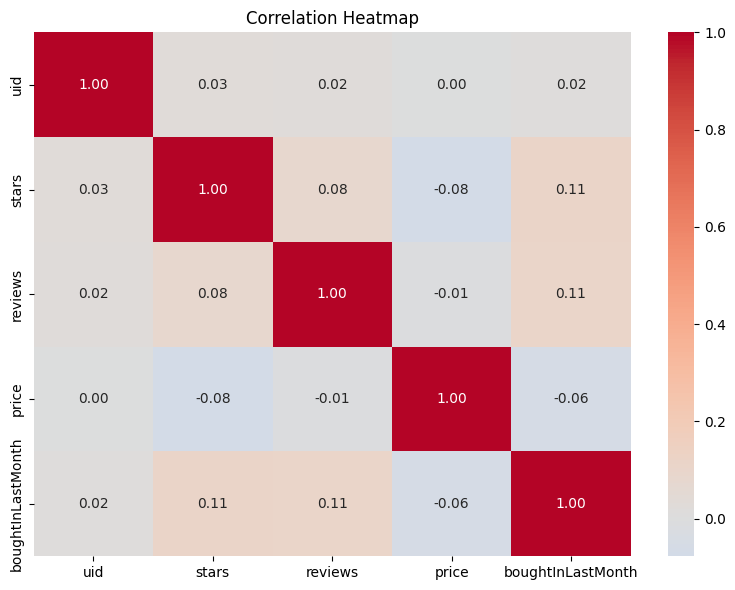

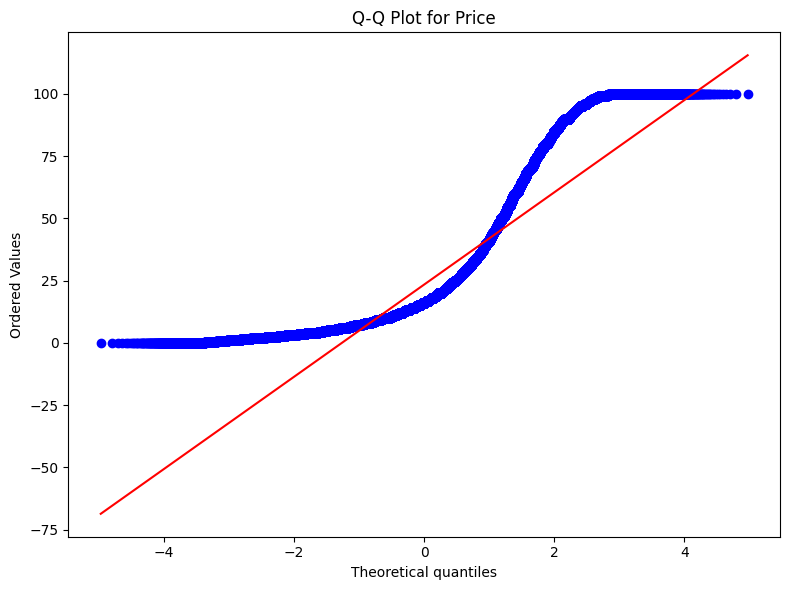


QQ plot shows if prices are normally distributed
Points on diagonal = normal distribution


In [8]:
print("PART 3: Price vs Rating Correlation")  # inconsistent - sometimes "Ratings" sometimes "Rating"

# correlation
corr = df_clean['price'].corr(df_clean['stars'])
print(f"\nCorrelation: {corr:.4f}")

if abs(corr) < 0.3:
    print("Weak correlation")
elif abs(corr) < 0.7:
    print("Moderate correlation")
else:
    print("Strong correlation")

# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_clean['stars'], df_clean['price'], alpha=0.3, s=10)
plt.xlabel('Stars')
plt.ylabel('Price')
plt.title('Price vs Rating Scatter')
plt.tight_layout()
plt.show()

# correlation heatmap
numerical = df_clean.select_dtypes(include=[np.number]).columns
corr_matrix = df_clean[numerical].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# QQ plot
from scipy.stats import probplot

plt.figure(figsize=(8,6))
probplot(df_clean['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Price')
plt.tight_layout()
plt.show()

print("\nQQ plot shows if prices are normally distributed")
print("Points on diagonal = normal distribution")